In [1]:
# Necessário pois a versão atual é incompatível com o mostrado no curso
#!pip install tensorflow==2.8.0
#!pip install protobuf==3.20.3


In [2]:

import cv2
import numpy as np
import pandas as pd
from google.colab.patches import cv2_imshow
import zipfile
import tensorflow
from tensorflow.python.keras.models import load_model
from keras.preprocessing.image import img_to_array
from keras.layers import BatchNormalization
%tensorflow_version 2.8.0
tensorflow.__version__

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


'2.8.0'

In [3]:
# Conexão com o google drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
'''path = "/content/gdrive/MyDrive/materiasi/Material.zip" # Armazenamento do caminho dos arquivos
zip_obj = zipfile.ZipFile(file = path, mode = "r") # Acesso do arquivo no modo de leitura
zip_obj.extractall("/content/gdrive/MyDrive/materiasi") # Extração dos arquivos zipados
zip_obj.close # Liberação de memória'''

'path = "/content/gdrive/MyDrive/materiasi/Material.zip" # Armazenamento do caminho dos arquivos\nzip_obj = zipfile.ZipFile(file = path, mode = "r") # Acesso do arquivo no modo de leitura\nzip_obj.extractall("/content/gdrive/MyDrive/materiasi") # Extração dos arquivos zipados\nzip_obj.close # Liberação de memória'

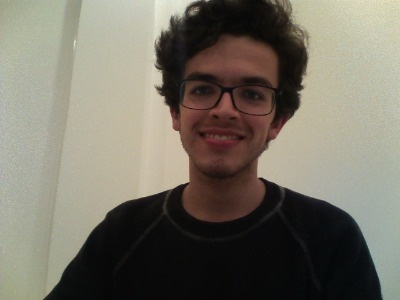

In [5]:
imagem = cv2.imread('/content/gdrive/MyDrive/materiasi/Material/testes/teste_gabriel.png')
cv2_imshow(imagem)

In [6]:

cascade_faces = "/content/gdrive/MyDrive/materiasi/Material/haarcascade_frontalface_default.xml" # Base de dados
caminho_modelo = "/content/gdrive/MyDrive/materiasi/Material/modelo_01_expressoes.h5" # Modelo de treinamento
face_detection = cv2.CascadeClassifier(cascade_faces) # Objeto para detecção de faces
expressoes = ["Raiva", "Nojo","Medo", "Feliz", "Triste","Surpreso", "Neutro"] # Classes
classificador_emocoes = load_model(caminho_modelo, compile=False, custom_objects = {'BatchNormalization': BatchNormalization}) # Classificador

In [7]:
original = imagem.copy() # Cópia da imagem
faces = face_detection.detectMultiScale(original,scaleFactor=1.1,minNeighbors=3 ,minSize=(20, 20)) # Armazenamento das faces
faces

array([[162,  40, 128, 128]], dtype=int32)

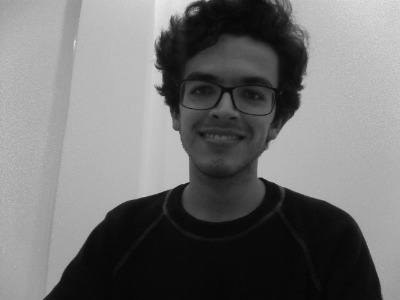

(300, 400)

In [8]:
cinza = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY) # Conversão para escala de cinza, aí ao invés de processar tres camadas só vai processar uma
cv2_imshow(cinza)
cinza.shape

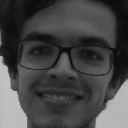

In [9]:
roi = cinza[40:40 + 128, 162:162 + 128] # Separa somente a face
cv2_imshow(roi)

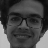

In [10]:
roi = cv2.resize(roi, (48, 48)) # Diminui o tamanho para melhorar a performance do treinamento
cv2_imshow(roi)

In [11]:
roi.dtype
roi = roi.astype('float')  # Converte os valores para float
roi = roi / 255
roi

array([[0.12941176, 0.11372549, 0.14901961, ..., 0.0627451 , 0.08627451,
        0.09803922],
       [0.1254902 , 0.14509804, 0.14509804, ..., 0.0627451 , 0.07843137,
        0.09803922],
       [0.1254902 , 0.14117647, 0.12156863, ..., 0.06666667, 0.08235294,
        0.09803922],
       ...,
       [0.72941176, 0.74117647, 0.74117647, ..., 0.70980392, 0.70980392,
        0.70588235],
       [0.7254902 , 0.7372549 , 0.74117647, ..., 0.70588235, 0.70980392,
        0.70588235],
       [0.7254902 , 0.7372549 , 0.7372549 , ..., 0.70196078, 0.70588235,
        0.70980392]])

In [12]:
roi = img_to_array(roi) # Transforma em um array

In [13]:
roi = np.expand_dims(roi, axis=0) # Adiciona uma nova dimensão para ficar compativel com o tensorflow
roi.shape

(1, 48, 48, 1)

In [14]:
preds = classificador_emocoes.predict(roi)[0] # Retorna a probabilidade
preds

array([1.6802111e-05, 5.7679665e-09, 1.1206568e-05, 9.9066460e-01,
       1.8033754e-05, 1.8518280e-05, 9.2708124e-03], dtype=float32)

In [15]:
len(preds) # Checagem de batimento dos números de classes

7

In [16]:
emocao_prob = np.max(preds) # Probabilidade da emoção
emocao_prob

0.9906646

In [17]:
preds.argmax() # Retorna a emoção com maior probabilidade
label = expressoes[preds.argmax()] # Retorna a emoção com maior probabilidade
label

'Feliz'

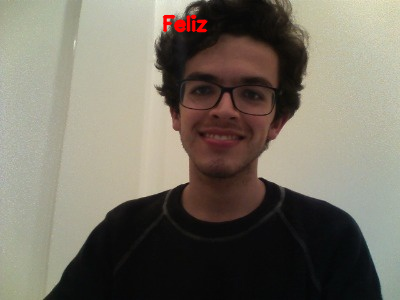

In [18]:
cv2.putText(original, label, (162, 40 -10), cv2.FONT_HERSHEY_SIMPLEX, 0.65, (0, 0, 255), 2, cv2.LINE_AA) # Coloca a emoção na imagem
cv2_imshow(original)

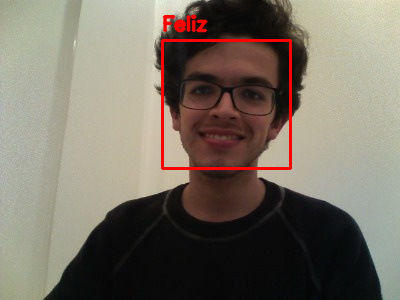

In [19]:
cv2.rectangle(original, (162, 40), (162 + 128, 40 + 128), (0, 0, 255), 2) # Coloca um retângulo na face
cv2_imshow(original)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
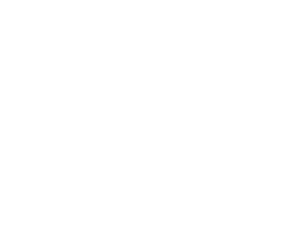

In [20]:
probabilidades = np.ones((250, 300, 3), dtype="uint8") * 255 # Vai ser usado para montar a barrinha de probabilidades
probabilidades

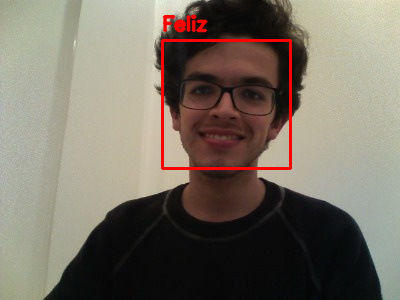

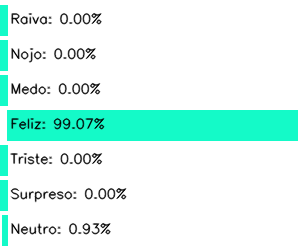

In [21]:
cv2_imshow(original)
if len(faces) == 1:
  for (i, (emotion, prob)) in enumerate(zip(expressoes, preds)):
    #print(i, emotion, prob)
    text = "{}: {:.2f}%".format(emotion, prob * 100)
    w = int(prob * 300)
    cv2.rectangle(probabilidades, (7, (i * 35) + 5), (w, (i * 35) + 35), (200, 250, 20), -1)
    cv2.putText(probabilidades, text, (10, (i * 35) + 23), cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 0), 1, cv2.LINE_AA)
cv2_imshow(probabilidades)